<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Pr%C3%A1tica_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como é no Perceptron

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, 
                                     x1_max+1,100), np.linspace(x2_min-1, 
                                                                x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

(100, 2) (100,)


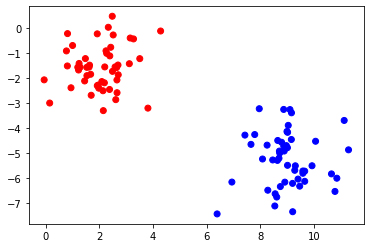

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=200)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

step 0: 3
step 30: 0
step 60: 0
step 90: 0
step 120: 0
step 150: 0
step 180: 0
step 210: 0
step 240: 0
step 270: 0
step 300: 0
step 330: 0
step 360: 0
step 390: 0
w:  [-0.43805472  0.45431093]
b:  -0.4941001969087396


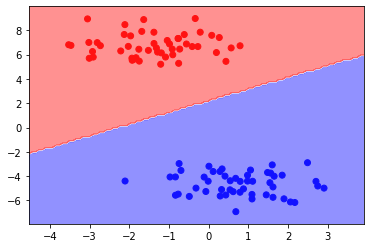

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*np.random.random()-1

learning_rate=0.05

for step in range(401):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b 
        y_pred = 1 if y_pred > 0 else 0 #comentar essa linha para se transformar em ADALINE
        error = y_n - y_pred
        w = w + learning_rate*np.dot(np.squeeze(error), np.squeeze(x_n)) 
        b = b + learning_rate*error
        cost += error**2
        
    if step%30 == 0:
        print('step {0}: {1}'.format(step, cost))
      
print('w: ', w)
print('b: ', b)
plot_linear_classifier(x, y, w, b)

# Como é no Adaline?

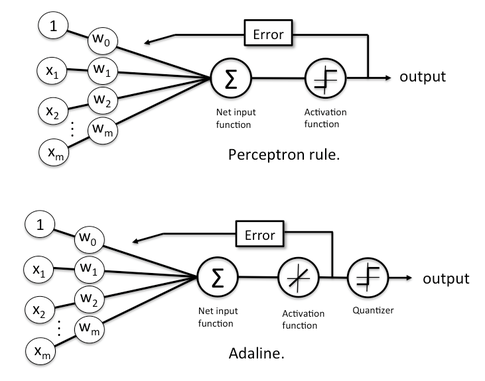

step 0: 150.98630661758213
step 30: 2.2788539491403528
step 60: 2.2800784699631174
step 90: 2.2800789155116497
step 120: 2.2800789156719716
step 150: 2.2800789156720396
step 180: 2.2800789156720396
step 210: 2.2800789156720396
step 240: 2.2800789156720396
step 270: 2.2800789156720396
step 300: 2.2800789156720396
step 330: 2.2800789156720396
step 360: 2.2800789156720396
step 390: 2.2800789156720396
step 420: 2.2800789156720396
step 450: 2.2800789156720396
step 480: 2.2800789156720396
w:  [-0.10343313  0.0465818 ]
b:  1.2805421415939122


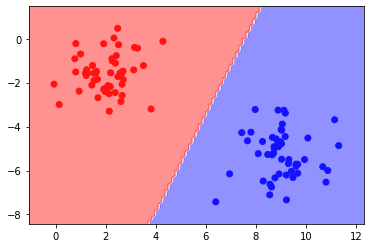

In [ ]:
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       

learning_rate = 0.01

for step in range(501): 
    cost = 0
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b 
        error = y_n - y_pred 
        w = w + learning_rate*np.dot(error, x_n) 
        b = b + learning_rate*error
        cost += error**2
    
    if step%30== 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)